Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
feats = boston.feature_names
X = pd.DataFrame(boston.data, columns=feats)
y = pd.DataFrame(boston.target, columns= ['price'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
scale = StandardScaler()
X_train_sc = pd.DataFrame(scale.fit_transform(X_train), columns = feats)
X_test_sc = pd.DataFrame(scale.fit_transform(X_test), columns = feats)

In [6]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_sc)

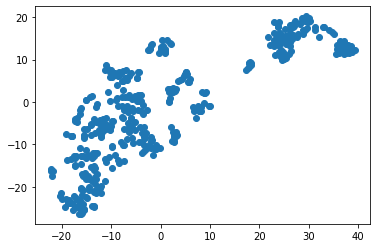

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [19]:
from sklearn.cluster import KMeans

KM_mdl = KMeans(n_clusters=3, random_state=42, max_iter = 100)
train_labels = KM_mdl.fit_predict(X_train_sc)

Text(0.5, 1.0, 'Train data')

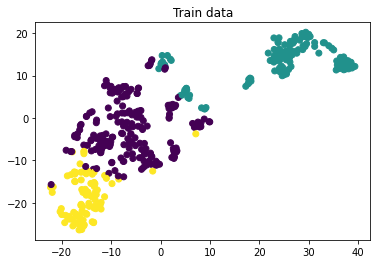

In [9]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=train_labels)

plt.title('Train data')

In [10]:
data_tr = pd.concat([X_train, y_train], axis = 1)
data_tr['Cluster'] = train_labels
data_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,Cluster
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0,1
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9,0
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4,2
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4,1
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,19.5,0
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1,0
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5,2
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4,1


In [11]:
price_mn = [data_tr[data_tr['Cluster'] == i]['price'].mean() for i in np.unique(train_labels)]
crim_mn = [data_tr[data_tr['Cluster'] == i]['CRIM'].mean() for i in np.unique(train_labels)]
print('средние по цене по кластерам [0,1,2]:')
print( price_mn)
print('средние по преступности по кластерам [0,1,2]:')
print( crim_mn)

средние по цене по кластерам [0,1,2]:
[24.958115183246072, 16.165354330708666, 27.788372093023252]
средние по преступности по кластерам [0,1,2]:
[0.42166020942408367, 10.797028425196853, 0.07356558139534886]


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [12]:
test_labels = KM_mdl.predict(X_test_sc)
data_tst = pd.concat([X_test, y_test], axis = 1)
data_tst['Cluster'] = test_labels

In [13]:
price_mn_tst = [data_tst[data_tst['Cluster'] == i]['price'].mean() for i in np.unique(test_labels)]
crim_mn_tst = [data_tst[data_tst['Cluster'] == i]['CRIM'].mean() for i in np.unique(test_labels)]
print('средние по цене по кластерам [0,1,2]:')
print( price_mn_tst)
print('средние по преступности по кластерам [0,1,2]:')
print( crim_mn_tst)

средние по цене по кластерам [0,1,2]:
[22.031111111111112, 16.437142857142856, 28.413636363636364]
средние по преступности по кластерам [0,1,2]:
[0.2845831111111111, 10.165531142857143, 0.07985181818181818]


*Задание 4
Обучите любую модель регрессии на этом же датасете. Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным. Сравнить качество без метки кластера и с ней по отложенной выборке.


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

In [15]:
#функция расчета ошибок
def errors(Pred, Test):
    mse1 = mse(Pred, Test) 
    mae1 = mae(Pred, Test) 
    r2_1 = r2(Pred, Test)
    return {'mse': mse1, 'mae': mae1, 'r2': r2_1}
X_train_sc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [16]:
display(X_train_sc)
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
res = errors(y_pred, y_test)


X_train_cl = pd.DataFrame(X_train_sc.loc[:, feats], columns = feats)
X_train_cl['Cluster'] = train_labels
X_test_cl = pd.DataFrame(X_test_sc.loc[:, feats], columns = feats)
X_test_cl['Cluster'] = test_labels
lr_cl = LinearRegression()
lr_cl.fit(X_train_cl, y_train)
y_pred_cl = lr_cl.predict(X_test_cl)
res_cl = errors(y_pred_cl, y_test)
print('Ошибки в обычной моделе:')
print(res)
#print(res['Y_pred'] - res_cl['Y_pred'])
print('Ошибки в моделе с кластером:')
print(res_cl)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


Ошибки в обычной моделе:
{'mse': 27.40683628433745, 'mae': 3.8526218505301544, 'r2': 0.6324301498481728}
Ошибки в моделе с кластером:
{'mse': 27.37531024469209, 'mae': 3.8602116734542866, 'r2': 0.6324303199960455}


Исходя из того, что величина ошибок почти одинаковая, добавление метки кластера не повляило на качество модели